# FBI NICS - Firearm Background Check Analysis

The FBI's National Instant Criminal Background Check System determines the eligibility of a buyer to purchase a firearm based on their criminal record. Its numbers are widely used as a proxy for gun sales in a given period of time. It was mandated by the Brady Handgun Violence Prevention Act of 1993 and later launched by the FBI in November of 1998. This is when NICS began collecting data.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

prod = pd.read_csv('nics-firearm-background-checks.csv', sep=',')


In [38]:
prod.columns
#print(prod.describe())

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

# NICS Data from April 2019

In [2]:
latest_info = prod.head(55)
print(latest_info)


      month                 state  ...  return_to_seller_other  totals
0   2019-04               Alabama  ...                     1.0   41146
1   2019-04                Alaska  ...                     0.0    6505
2   2019-04               Arizona  ...                     0.0   30222
3   2019-04              Arkansas  ...                     0.0   15812
4   2019-04            California  ...                     0.0  114466
5   2019-04              Colorado  ...                     0.0   39433
6   2019-04           Connecticut  ...                     0.0   15726
7   2019-04              Delaware  ...                     0.0    3807
8   2019-04  District of Columbia  ...                     0.0     409
9   2019-04               Florida  ...                     0.0   93693
10  2019-04               Georgia  ...                     0.0   40952
11  2019-04                  Guam  ...                     0.0     150
12  2019-04                Hawaii  ...                     0.0    1212
13  20

## Average Number of Permits Checks for April 2019

In [12]:
average_permits = latest_info['permit'].mean()
print(average_permits)

14872.127272727274


## States with the greatest number of permit checks April *2019*

In [3]:
most_permits = latest_info[['state', 'permit']].sort_values(by = 'permit', ascending = False)
top_permits = most_permits.head(10)
top_permits

,state,permit
18,Kentucky,361715.0
4,California,46004.0
15,Indiana,41080.0
46,Texas,28638.0
35,North Carolina,27292.0
0,Alabama,26958.0
40,Pennsylvania,24075.0
24,Michigan,21511.0
10,Georgia,19573.0
9,Florida,18613.0


## States with the fewest number of permit checks April *2019*

In [4]:
least_permits = most_permits.tail(10)
least_permits

,state,permit
36,North Dakota,438.0
8,District of Columbia,282.0
1,Alaska,243.0
49,Virgin Islands,82.0
21,Mariana Islands,0.0
11,Guam,0.0
48,Vermont,0.0
32,New Jersey,0.0
42,Rhode Island,0.0
41,Puerto Rico,0.0


Permits, however, are not a good measure of gun sales because not all states require one to purchase a firearm.

## Average number of total gun background checks April 2019

In [19]:
average_checks = latest_info['totals'].mean()
print(average_checks)

41911.56363636364


## States with the greatest number of total gun background checks April 2019



In [5]:
most_totals = latest_info[['state','totals']].sort_values(by = 'totals', ascending = False)
most_totals.head(10)

,state,totals
14,Illinois,405464
18,Kentucky,381411
4,California,114466
46,Texas,106112
15,Indiana,106096
9,Florida,93693
40,Pennsylvania,79853
47,Utah,77263
25,Minnesota,72720
37,Ohio,53819


## States with the fewest number of total gun background checks April 2019


In [6]:
most_totals.tail(10)

,state,totals
54,Wyoming,4821
7,Delaware,3807
48,Vermont,3236
41,Puerto Rico,2427
42,Rhode Island,2175
12,Hawaii,1212
8,District of Columbia,409
11,Guam,150
49,Virgin Islands,114
21,Mariana Islands,15


#Regulation

##Top 10 states with the strictest regulation

In [7]:
strict_states = latest_info[
	(latest_info['state'] == 'California') | 
	(latest_info['state'] == 'New Jersey') |
	(latest_info['state'] == 'Connecticut') | 
	(latest_info['state'] == 'Massachusetts') |
	(latest_info['state'] == 'New York') |
	(latest_info['state'] == 'Hawaii') |
	(latest_info['state'] == 'Maryland') |
	(latest_info['state'] == 'Rhode Island') |
	(latest_info['state'] == 'Illinois') |	
	(latest_info['state'] == 'Delaware')
]


strict_states['state']

4        California
6       Connecticut
7          Delaware
12           Hawaii
14         Illinois
22         Maryland
23    Massachusetts
32       New Jersey
34         New York
42     Rhode Island
Name: state, dtype: object

## Top 10 states with most lax regulation

In [8]:
lax_states = latest_info[
	(latest_info['state'] == 'Utah') | 
	(latest_info['state'] == 'Alaska') |
	(latest_info['state'] == 'Arizona') | 
	(latest_info['state'] == 'Oklahoma') |
	(latest_info['state'] == 'North Dakota') |
	(latest_info['state'] == 'Montana') |
	(latest_info['state'] == 'Louisiana') |
	(latest_info['state'] == 'Kentucky') |	
	(latest_info['state'] == 'Idaho') |
	(latest_info['state'] == 'Wisconsin')
]

lax_states['state']

1           Alaska
2          Arizona
13           Idaho
18        Kentucky
19       Louisiana
28         Montana
36    North Dakota
38        Oklahoma
47            Utah
53       Wisconsin
Name: state, dtype: object

## Total gun background checks in strict states

In [9]:
strict_totals = strict_states[['state', 'totals']].sort_values(by = 'totals', ascending = False)
strict_totals

,state,totals
14,Illinois,405464
4,California,114466
34,New York,31154
23,Massachusetts,17738
6,Connecticut,15726
22,Maryland,12537
32,New Jersey,8173
7,Delaware,3807
42,Rhode Island,2175
12,Hawaii,1212


## Total gun background checks in lax states

In [10]:
lax_totals = lax_states[['state', 'totals']].sort_values(by = 'totals', ascending = False)
lax_totals

,state,totals
18,Kentucky,381411
47,Utah,77263
53,Wisconsin,38561
2,Arizona,30222
38,Oklahoma,26528
19,Louisiana,19650
13,Idaho,16004
28,Montana,9419
1,Alaska,6505
36,North Dakota,5135


It appears that more people in lax states buy guns than in stricts states. For example, Kentucky performed 266,945 more background checks than California even though  there are over 35 million more people in California than in Kentucky. Utah performed 46,109 more background checks than New York even though there are over 18 million more people in New York than in Utah. 
*(Population data is as of 2018, Source: US Census Bureau)*

## Number of permit checks in strict states

Although permit checks are not used to estimate sales, below is a look into them out of curiosity.

In [11]:
strict_permits = strict_states[['state', 'permit']].sort_values(by = 'permit', ascending = False)
strict_permits

,state,permit
4,California,46004.0
14,Illinois,14158.0
23,Massachusetts,10866.0
6,Connecticut,8167.0
34,New York,3926.0
22,Maryland,3839.0
12,Hawaii,1207.0
7,Delaware,519.0
32,New Jersey,0.0
42,Rhode Island,0.0


New Jersey and Rhode Island performed no permit checks, even though they performed 8,173 and 2,175 total background checks respectively.

## Number of permit checks in lax states

In [12]:
lax_permits = lax_states[['state', 'permit']].sort_values(by = 'permit', ascending = False)
lax_permits

,state,permit
18,Kentucky,361715.0
47,Utah,16689.0
53,Wisconsin,9159.0
13,Idaho,6608.0
2,Arizona,6120.0
38,Oklahoma,3558.0
19,Louisiana,2285.0
28,Montana,1417.0
36,North Dakota,438.0
1,Alaska,243.0


Kentucky and Utah lead again in the number of permit checks.

# Permit Rechecks

## States with the greatest number of permit rechecks

In [51]:
permit_rechecks = latest_info[['state', 'permit_recheck']].sort_values(by='permit_recheck', ascending = False)
permit_rechecks.head(5)

,state,permit_recheck
14,Illinois,360461.0
47,Utah,52805.0
15,Indiana,33562.0
25,Minnesota,32947.0
16,Iowa,7113.0


Utah is categorized as a state with lax regulation, yet is one of the states that performed the most permit rechecks in April 2019.

## States with no permit rechecks
As shown below, 29 states did not perform permit rechecks in April 2019.

In [57]:
no_checks = permit_rechecks[ permit_rechecks['permit_recheck'] == 0.0]
print(no_checks)
print('_________________________________')
print(no_checks.shape)

                   state  permit_recheck
21       Mariana Islands             0.0
8   District of Columbia             0.0
9                Florida             0.0
44          South Dakota             0.0
45             Tennessee             0.0
46                 Texas             0.0
7               Delaware             0.0
48               Vermont             0.0
49        Virgin Islands             0.0
41           Puerto Rico             0.0
5               Colorado             0.0
52         West Virginia             0.0
4             California             0.0
42          Rhode Island             0.0
38              Oklahoma             0.0
40          Pennsylvania             0.0
10               Georgia             0.0
22              Maryland             0.0
11                  Guam             0.0
36          North Dakota             0.0
12                Hawaii             0.0
33            New Mexico             0.0
32            New Jersey             0.0
31         New H

Guns were exchanged in every state in April 2019, yet the above 29 states performed no permit rechecks. These states include Maryland, Rhode Island, Delaware, New Jersey, Hawaii and California which have some of the strictest gun regulation in the country.

# Handguns

Although the majority of guns owned by Americans are not handguns, handguns are responsible for a disproporational amount of gun deaths.

In [54]:
handguns = latest_info[['state', 'handgun']].sort_values(by='handgun', ascending = False)
handguns

,state,handgun
9,Florida,48329.0
40,Pennsylvania,42418.0
46,Texas,38994.0
4,California,37484.0
37,Ohio,22541.0
45,Tennessee,21848.0
14,Illinois,21307.0
50,Virginia,20270.0
15,Indiana,18528.0
51,Washington,17631.0


## States with the most handgun background checks April 2019

In [55]:
handguns.head(5)

,state,handgun
9,Florida,48329.0
40,Pennsylvania,42418.0
46,Texas,38994.0
4,California,37484.0
37,Ohio,22541.0


California is a state that has relatively strict gun regulation. It appears on the list above due to the size of its population. Texas and Florida also have large populations. All five states have greater than 11 million people, however California has the greatest population and is only fourth on the list.

## States with the fewest handgun background checks April 2019

In [56]:
handguns.tail(5)

,state,handgun
11,Guam,88.0
29,Nebraska,84.0
49,Virgin Islands,24.0
21,Mariana Islands,6.0
12,Hawaii,0.0


All of these states/territories have small populations, which is most likely the reason why they have the fewest handgun background checks. However, it is important to remember that Hawaii has strict gun regulation. Evidence of prior saftey training is required to acquire a permit for a handgun in Hawaii *(Source: Hawaii Rifle Association)*.

# Gun deaths per capita

This section tracks the monthly gun background check totals and gun permit checks over time for the state with the lowest and highest per capita gun deaths *(Source: National Center for Injury Prevention and Control within CDC)*.

## State with lowest per capita gun deaths: Massachusetts

### Monthly total gun background checks

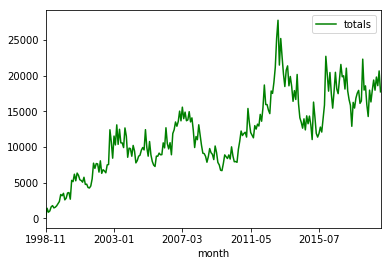

<Figure size 432x288 with 0 Axes>

In [21]:
only_mass = prod[ prod['state'] == 'Massachusetts']
mass_over_time = only_mass[['month','state', 'totals']].sort_values(by = 'month', ascending = True)
#print(mass_over_time)
ax = plt.gca()

mass_over_time.plot(kind='line',x='month',y='totals', color='green', ax=ax)

plt.show()
plt.savefig('output.png')

In 1998, Massachusetts enacted 23 gun laws to decrease gun violence deaths. A study published in the academic journal *Economic Letters* in 2019 , writes that the laws decreased successful suicide rates in that state. However, it appears that the monthly totals are increasing.

### Monthly gun permit checks

The graph below shows the number of permits issued over time. The amount of permits per month has been fluctuating for the last two decades.

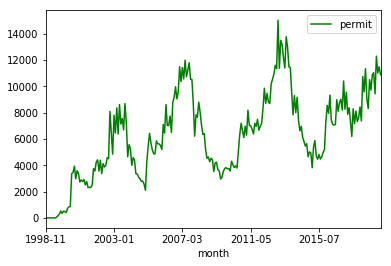

<Figure size 432x288 with 0 Axes>

In [33]:
ax = plt.gca()

mass_permit_over_time = only_mass[['month','state', 'permit']].sort_values(by = 'month', ascending = True)

mass_permit_over_time.plot(kind='line',x='month',y='permit', color='green', ax=ax)

plt.show()
plt.savefig('output.png')

## State with the highest per capita gun deaths: Alaska

### Monthly total gun background checks



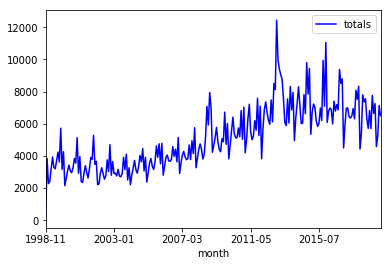

<Figure size 432x288 with 0 Axes>

In [22]:
only_alaska = prod[ prod['state'] == 'Alaska']
alaska_over_time = only_alaska[['month','state', 'totals']].sort_values(by = 'month', ascending = True)
#print(alaska_over_time)

ax = plt.gca()

alaska_over_time.plot(kind='line',x='month',y='totals', color='blue', ax=ax)

plt.show()
plt.savefig('output.png')

### Monthly gun permit checks

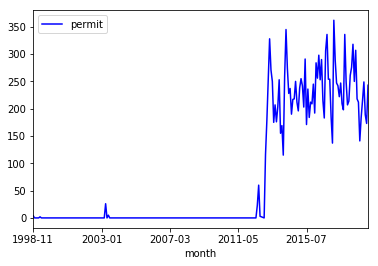

<Figure size 432x288 with 0 Axes>

In [34]:
ax = plt.gca()

alaska_permit_over_time = only_alaska[['month','state', 'permit']].sort_values(by = 'month', ascending = True)

alaska_permit_over_time.plot(kind='line',x='month',y='permit', color='blue', ax=ax)

plt.show()
plt.savefig('output.png')

The increase in total gun background checks began increasing before the surge in the number of permits checked. It is possible that the guns exchanged before the surge were exchanged without permits. It is also possible that regulations changed.

# Conclusion

This brings us to some of the major issues with using this set of data in isolation: 

1. A one-to-one correlation cannot be made between firearm background checks and the sale of firearms, however, background checks are often used as a proxy for sales. Out of 230 million background checks, 1.3 million have been denied, or about 0.56% *(Source: fbi.gov)*.

2. It only captures the legal gun market.

3. It only captures guns sold by licensed dealers. Because of the Gun Control Act of 1968, federal law does not require private dealers to conduct background checks. Therefore, those sales would not be in this database.

4. It does not capture guns sold at gun shows where dealers can sell to individuals without permits/licenses (state legislation can override this, and does so in the states with strict regulation).

5. The data set gives a look into monthly changes and totals, but not overall totals in each state and nationwide.

6. Per capita comparisons are more effective because they compensate for the large differences in state populations. For example, California has over 36 million more people than Alaska.